# Observations and Insights 
The mean tumor volume for the drug treatment Capomulin and Ramicane were 40.68 mm3 and 40.22 mm3, respectively. This was about 12 mm3 less than the other eight drug regimens. Maybe Capomulin and Ramicane had lower tumor volumes at time zero. These two treatments also had the highest number of measurements taken.

The pie charts show nearly an even distribution between male and female mice.

The box plots of final tumor volume for four drug regimens show that Capomulin and Ramicane were both quite a bit lower than 
Infubinol and Ceftamin. Furthur testing would need to be done to see if there is a significant difference.

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.95. This shows a strong, 
positive relationship between weight and average tumor volume for this treatment. The scatter plot and regression model give 
further visual evidence of this strong relationship.




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# How many rows are in the df.
print(f"There are {len(df)} rows in the data frame")

There are 1893 rows in the data frame


In [3]:
# Checking the number of mice.
number_of_mice = len(df['Mouse ID'].unique())
print(f"The number of mice is {number_of_mice}.")

The number of mice is 249.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = df[df.duplicated(['Mouse ID','Timepoint'])]
duplicated['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df.drop(df[df['Mouse ID'] == 'g989'].index, inplace = True)
print(f"There are now {len(df)} rows in the data frame.")

There are now 1880 rows in the data frame.


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(df['Mouse ID'].unique())
print(f"There are now {number_of_mice} in the data frame.")

There are now 248 in the data frame.


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary satatistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
summary['Median'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median()
summary['Variance'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var()
summary['Std. Dev.'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').std()
summary['SEM'] = df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem()
summary = summary.rename(columns = {'Tumor Volume (mm3)': 'Mean'})

summary

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std','sem']})            

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

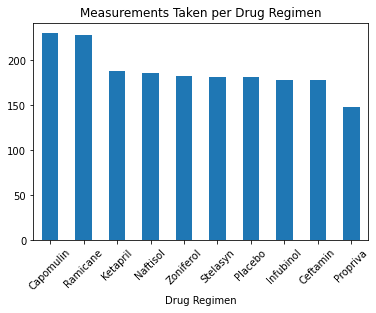

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group = df.groupby('Drug Regimen')
counts = drug_group['Drug Regimen'].count()
count = counts.sort_values(ascending = False)
drug_chart = count.plot(kind = 'bar', rot = 45, title = "Measurements Taken per Drug Regimen")

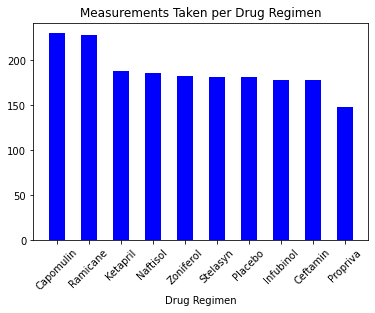

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(count.index, count, width = 0.5, color='b',alpha = 1, align = 'center')
plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.title("Measurements Taken per Drug Regimen")
plt.show()

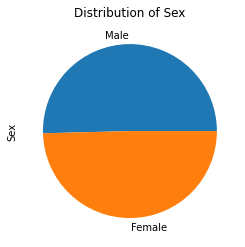

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_time_0 = df.loc[df['Timepoint'] == 0]
df_gend = df_time_0[['Mouse ID','Sex']]
gender = df_gend['Sex']
counts = gender.value_counts()
counts
plot = counts.plot.pie(y= 'Sex', figsize=(4, 4))
plt.title("Distribution of Sex")
plt.show()

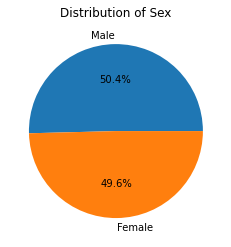

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%")
plt.title("Distribution of Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#df = df.loc[(df['Drug Regimen'] == 'Capomulin') | (df['Drug Regimen'] == 'Ramican') |(df['Drug Regimen'] == 'Infubinol') | (df['Drug Regimen'] == 'Ceftamin')]
group = df.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
great = group['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(df, great, on = "Mouse ID")

merge_df = merge_df.loc[(merge_df['Drug Regimen'] == 'Capomulin') | (merge_df['Drug Regimen'] == 'Ramicane') |(merge_df['Drug Regimen'] == 'Infubinol') | (merge_df['Drug Regimen'] == 'Ceftamin')]
merge_df['Drug Regimen'].value_counts()

final = merge_df.loc[merge_df['Timepoint_x'] == merge_df['Timepoint_y']]
final_volume = final[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
volume = final_volume['Tumor Volume (mm3)']
final_volume

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
1784,x822,Ceftamin,61.386660
1800,y163,Infubinol,67.685569
1832,y769,Ceftamin,68.594745
1842,y865,Ceftamin,64.729837


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merge_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
        tumor_volume.append(final_volume[final_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
   
    # Determine outliers using upper and lower bounds
outliers = final_volume.loc[(final_volume['Tumor Volume (mm3)'] < lower_bound) | (final_volume['Tumor Volume (mm3)'] > upper_bound)]
print(f"The number of outliers is {len(outliers)}.")


The lower quartile of volume is: 37.187743802499995
The upper quartile of volume is: 59.930261755000004
The interquartile range of volume is: 22.74251795250001
The the median of volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
The number of outliers is 0.


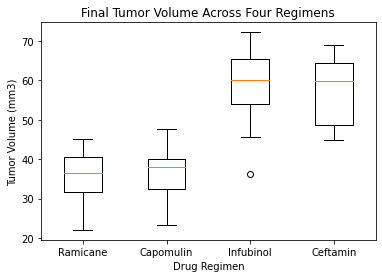

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Across Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
x_axis = np.arange(1,5)
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
ax1.boxplot(tumor_volume)
plt.xticks(tick_locations,treatments)
plt.show()

## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Make a list of Mouse ID's for treatment Capomulin
treat_group = df.loc[df['Drug Regimen'] == 'Capomulin']
mice = treat_group['Mouse ID'].unique()
print(mice)
print(len(mice))

['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']
25


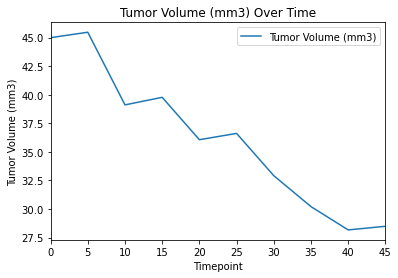

In [19]:
# Choose a mouse from the mice list from index 0-24
mouse = mice[1]
capo = df.loc[ df['Mouse ID'] == mouse]
group = capo.groupby('Mouse ID')

# Make the line plot for a mouse
x_axis = 'Timepoint'
y_axis = 'Tumor Volume (mm3)'
group.plot.line(x_axis, y_axis, title="Tumor Volume (mm3) Over Time")
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0,45)
plt.show()

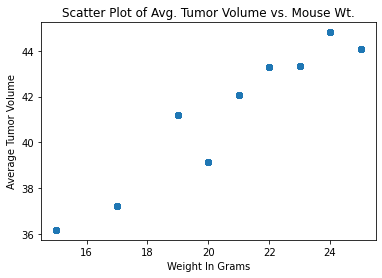

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Get all the rows for Capomulin
group = df.loc[df['Drug Regimen'] == 'Capomulin']

# Get the average of tumor volume and merge list with data frame group
avg =  group[['Weight (g)','Tumor Volume (mm3)']].groupby('Weight (g)').mean()
merge = pd.merge(group, avg, on = 'Weight (g)')

# Get the x and y values and make the scatter plot
x_values = merge['Weight (g)']
y_values = merge['Tumor Volume (mm3)_y']
plt.scatter(x_values, y_values)
plt.xlabel('Weight In Grams')
plt.ylabel('Average Tumor Volume')
plt.title('Scatter Plot of Avg. Tumor Volume vs. Mouse Wt.')
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {correlation[0]}")

The correlation coefficient is 0.9528616226069968


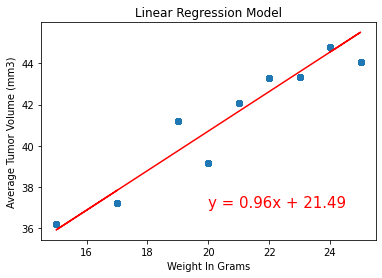

In [22]:
# linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Get the values for the regression, make the line equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Make the scatter plot with regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Weight In Grams')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression Model')
plt.show()